In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
#"key"=api_key
from config import api_key

# Data Exploration


This section contains the code used to explore the APIs and data the group explored for the project

In [ ]:
# url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
# params = {"appid":'212910'}

# response = requests.get(url, params=params).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
# appid_df = pd.DataFrame()
# appid_df['Player Count'] = ""


# #Google Search for top rated STEAM video games 
# ids = ['1174180', '715950', '499450', '590380', '593380', '231200', '1085660', '653530' ]
# url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
# index = 0
# for appid in action_df.l:
#     params = {"appid":appid}
    
#     #rl = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
#     response = requests.get(url, params=params).json()
#     try:
#         player_count = response['response']['player_count']
    
#     except Exception as e:
        
#         print("did not find count") 
        
#     appid_df.loc[index,'Player Count'] = player_count
    
#     index = index + 1
# # response = requests.get(url, params=params).json()
# #print(json.dumps(player_count, indent=4, sort_keys=True))
# appid_df

In [ ]:
#Returns games with this particular tag
# url = 'https://steamspy.com/api.php?request=tag&tag=Early+Access'
# response = requests.get(url)
# response.json()

In [ ]:
#Returns games in the selected genre. Requires *genre* parameter. 
new_url = 'https://steamspy.com/api.php?request=genre&genre=action' 
response = requests.get(new_url).json()
response
action_df = pd.DataFrame(response).T
len(action_df)

In [ ]:
#Steps to create a clean data frame with all of the data from the action genre
#action_df = action_df.reset_index()
#del action_df['index']
#del action_df['level_0']
action_df.head()
#action_df.to_csv('Action_Genre_Data.csv', index=False)

In [ ]:
#Create a player count Table using the AppID
app_count = [] 
appid_list = []
#Used to test the for loop21166:24777
# test_df = action_df.head()
#created to iterate through different portions of the action_df before connection to site errors out
set_df = action_df.iloc[21166:24777,0:2]

# search for player count by appid  
#url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"

for index, row in set_df.iterrows():
    appid = row['appid'] 
    name = row['name']
   
    print(f'checking index {index} AppId {appid} , Name {name}')
    
    params = {'appid': appid}
    url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
    
    response = requests.get(url, params=params).json()
    try:
        player_count = response['response']['player_count']
    
    except Exception as e:
        
        print("did not find count") 
        
    app_count.append(player_count)
    appid_list.append(appid)

In [ ]:
#appid_df = pd.DataFrame()
#print(f'{appid_list} , {app_count}') 
#len(appid_list)
#len(app_count)

In [ ]:
#Create DF with appid and player count 
combineddata = {'appid':appid_list, 'player count':app_count}
combined_list_df = pd.DataFrame(combineddata)

combined_list_df

new_combined_df = pd.merge(combined_list_df,action_df, how="left", on=['appid','appid'])
new_combined_df

In [ ]:
updated_data_types = {'average_forever': float, 'average_2weeks': float, 'median_forever': float, 'negative':float, 'positive': float,
                      'median_2weeks': float,'price': float, 'initialprice': float, 'discount': float, 'ccu': float}

new_combined_df = new_combined_df.astype(updated_data_types)
#new_combined_df.to_csv('AppID_PlayerCount_7.csv', index=False) 
new_combined_df

In [ ]:
#read in each of the csv files created
appid_playercount = pd.read_csv('./AppID_PlayerCount.csv')
appid_playercount2 = pd.read_csv('./AppID_PlayerCount_2.csv')
appid_playercount3 = pd.read_csv('./AppID_PlayerCount_3.csv')
appid_playercount4 = pd.read_csv('./AppID_PlayerCount_4.csv')
appid_playercount5 = pd.read_csv('./AppID_PlayerCount_5.csv')
appid_playercount6 = pd.read_csv('./AppID_PlayerCount_6.csv')
appid_playercount7 = pd.read_csv('./AppID_PlayerCount_7.csv')

In [ ]:
# final_combined_df = pd.concat([appid_playercount,appid_playercount2, appid_playercount3, appid_playercount4, 
#             appid_playercount5, appid_playercount6, appid_playercount7])

final_combined_data_df = pd.read_csv('./Final_Combined_DataF.csv')
#final_combined_df.to_csv('Final_Combined_Data.csv', index=False)
final_combined_data_df.dtypes

In [ ]:
#Create charts to show relationships between SEAMS elements 
final_combined_df = final_combined_data_df.sort_values('player count', ascending=False)
x = final_combined_df.head(100)
x
x.plot('player count', 'average_forever', kind='line', title='Comparison of Player Count to Average Play Time (min)', xlabel='Player Count', ylabel='Average Player Time (min)')
x.plot('player count', ['positive', 'negative'], kind='line', title='Compariosn of Player Count to Feedback', xlabel='Player Count', ylabel='Number of Positive Comments')
x.plot('player count', 'average_forever', kind='scatter', title='Scatter Plot of Average Play Time')
y = x.sort_values('average_forever', ascending=False)
y = y.head(100)
y.plot('average_forever', ['positive','negative'], kind='line',title='Comparison of Average Player Time to Feedback', xlabel='Average Player Time', ylabel='Number of Positive Comments')
#plt.savefig("Player v Comments.png")

In [ ]:
import scipy.stats as st
x.plot('player count', 'average_forever', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"average_forever"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(50000,5000),fontsize=15,color="red")
plt.title("Player Count v. Average Player Time")
plt.xlabel("Player Count")
plt.ylabel("Avg Player Time")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.savefig("Player Count v Avg Player Time.png")

In [ ]:
x.plot('player count', 'positive', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(100000,5000),fontsize=15,color="red")
plt.title("Player Count v. Positive Comments")
plt.xlabel("Player Count")
plt.ylabel("Positive Feedback")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.savefig("Player Count v Positive Comments.png")

In [ ]:

# steamdata = {'APP ID':appid_info,'App Name': app_name, 'Avg Total Play Time': avg_play_total_time,'Median Total Play Time': avg_median_total, 
#              'Avg Play Time 2 Weeks': avg_play_time_2weeks, 'Median 2 Weeks':median_2Weeks, 'Price':price
#             }
# # steam_df['APP ID'] = appid_info
# # steam_df['App Name'] = app_name
# # steam_df['Avg Play Time'] = avg_play_total_time
# # steam_df['Median Play Time'] =  avg_median_total
# # steam_df['Avg Play Time 2 Weeks'] = avg_play_time_2weeks
# # steam_df['Median 2 Weeks'] = median_2Weeks
# steam_df = pd.DataFrame(steamdata)
    
# steam_df

In [ ]:
#Returns the Top 100 apps by players in the last two weeks
new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
steam_df = pd.DataFrame()
steam_df['APP ID'] = ""
steam_df['App Name'] = ""
steam_df['Avg Play Time'] = ""
steam_df['Avg Play Time 2 Weeks'] = ""

# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# params = { '?request=': 'top50', "length":"in2weeks"}
response = requests.get(new_url).json()
#top100_df = pd.DataFrame(response).T
#top100_df
#top100_df.to_csv('Top100.csv', index=False) 

In [ ]:
#top100_df.dtypes

In [ ]:
#return apps with 1,000-1,999 owners.
new_url = 'https://steamspy.com/api.php?request=all&page=1'
steam_df = pd.DataFrame()
steam_df['APP ID'] = ""
steam_df['App Name'] = ""
steam_df['Avg Play Time'] = ""
steam_df['Avg Play Time 2 Weeks'] = ""

# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# params = { '?request=': 'top50', "length":"in2weeks"}
response = requests.get(new_url).json()
# response. weather_df.to_csv('WeatherPy.csv', index=False) 
owners_df = pd.DataFrame(response).T
owners_df = owners_df.reset_index()
del owners_df['index']
owners_df
#response
#owners_df.to_csv('SEAMS_Data.csv', index=False)

In [ ]:
# new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# new_url2 = 'https://steamspy.com/api.php?request=appdetails&appid=231200'
# steam_df = pd.DataFrame()
# steam_df['APP ID'] = ""
# steam_df['App Name'] = ""
# steam_df['Avg Play Time'] = ""
# steam_df['Median Play Time'] = ""
# steam_df['Avg Play Time 2 Weeks'] = ""
# steam_df['Median Play Time 2 Weeks'] = ""
# # new_url = 'https://steamspy.com/api.php?request=top100in2weeks'
# # params = { '?request=': 'top50', "length":"in2weeks"}
# response = requests.get(new_url2).json()
# response 

Final DataFrame and Group Code Starts Here

In [ ]:
final_combined_data_df = pd.read_csv('./Final_Combined_DataF.csv')

In [ ]:
final_combined_data_df

In [ ]:
#Nico's code
plt.scatter(final_combined_data_df.iloc[:,14],final_combined_data_df.iloc[:,1])
plt.xlabel('Price')
plt.ylabel('Player')
plt.show()
#why is the price not between 0 and 99?

In [ ]:
#Nico's code
bar_users = final_combined_data_df.groupby("Tier")["player count"].sum()
bar_users.plot(kind="bar")

plt.show()

In [ ]:
#Nico's code
final_price = final_combined_data_df.groupby("Tier")["Final Price_$"].mean()
final_price.plot(kind="line")
plt.show()
#how to combine line and bar?

In [ ]:
final_combined_data_df[["Mark"]].str.replace("%","")
final_combined_data_df[["Mark"]].astype(int)
avg_rating=final_combined_data_df.groupby("Tier")["Mark"].mean()

In [2]:
#Yi's code start here
df=pd.read_csv(r'Final_Combined_DataF.csv')

In [3]:
#compare median_2week and median_forever for each game
#replace all NaN to 0
df=df.fillna(0)
# df2=df[df['median_2weeks']>df['median_forever']]
df['median_range']=df['median_2weeks']-df['median_forever']
#sort by difference 
df=df.sort_values(by=['median_range'],ascending=[False])
df

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier,median_range
1421,1252780,291,Bloons Monkey City,Ninja Kiwi,Ninja Kiwi,0.0,3781,339,0,"200,000 .. 500,000",...,0,0,296,142.30,0.00,0.00,4120,92%,I,14110
2588,766370,1,Dying Light: Bad Blood,Techland,Techland Publishing,0.0,2533,1085,0,"100,000 .. 200,000",...,0,0,1,126.94,0.00,0.00,3618,70%,J,12532
167,8500,2909,EVE Online,CCP,CCP,0.0,21302,7361,0,"2,000,000 .. 5,000,000",...,0,0,3892,105.36,0.00,0.00,28663,74%,F,10412
1404,1344350,32,SUCCUBUS: Prologue,Madmind Studio,Madmind Studio,0.0,4281,907,0,"200,000 .. 500,000",...,0,0,38,102.04,0.00,0.00,5188,83%,I,10151
64,466240,272,Deceit,World Makers,World Makers,0.0,66505,17722,0,"5,000,000 .. 10,000,000",...,0,0,703,84.41,0.00,0.00,84227,79%,E,8348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,552300,0,Soldier Sortie :VR Agent 006,"Shandong Jerei Digital Technology Co.,LTD.","Shandong Jerei Digital Technology Co.,LTD.",0.0,7,6,0,"0 .. 20,000",...,1999,0,0,0.00,19.99,19.99,13,54%,M,-180054
1866,1437820,35,Heroes of the Three Kingdoms,"USERJOY Technology Co.,Ltd.","USERJOY Technology Co.,Ltd.",0.0,912,72,0,"200,000 .. 500,000",...,99,0,103,126.94,0.99,0.99,984,93%,I,-261926
8037,581910,0,Iron Armada,Bluedrake42 Limited Company,Bluedrake42 Limited Company,0.0,123,30,0,"0 .. 20,000",...,0,0,0,126.94,0.00,0.00,153,80%,M,-361814
8108,1097800,0,Stranger Things 3: The Game,BonusXP,BonusXP,0.0,499,66,0,"0 .. 20,000",...,0,0,0,200.88,0.00,0.00,565,88%,M,-438597


In [5]:
df_counts=df['Tier'].value_counts(sort=True,ascending=True)
Tiers=pd.DataFrame(df_counts)
df2 = Tiers.rename_axis('Tiers').reset_index()
df2

,Tiers,Tier
0,A,1
1,B,4
2,C,17
3,D,31
4,E,68
5,F,230
6,G,320
7,H,495
8,I,957
9,J,1079


In [6]:
list_com5=df2['Tiers']
game_count_list=[]
price_list=[]
mean_fen_list=[]
ccu_sum_list=[]
median_range_list=[]

for com in list_com5:
    df_tmp=df[df['Tier']==com]
    mean_price=df_tmp['price'].mean()
    price_list.append(mean_price)

    game_count=len(df_tmp['name'])
    game_count_list.append(game_count)

    median_range_mean=df_tmp['median_range'].mean()
    median_range_list.append(median_range_mean)

df_com5=pd.DataFrame({'game_count':game_count_list,'mean_price':price_list,'median_difference_mean':median_range_list},index=list_com5)
df_com5

,game_count,mean_price,median_difference_mean
Tiers,,,
A,1,0.000000,201.000000
B,4,999.750000,-4131.250000
C,17,979.588235,-1047.470588
D,31,874.322581,-270.419355
E,68,1613.588235,-245.455882
F,230,1594.782609,-209.952174
G,320,1638.768750,-306.450000
H,495,1278.032323,-321.989899
I,957,1041.185998,-735.590387


In [7]:
#Modify the mean_price and median_difference_mean value
df_com5['mean_price'] = round(df_com5['mean_price']) * 0.01
df_com5['median_difference_mean'] =round(df_com5['median_difference_mean'])
## Using reset_index to convert index to column
df3 = pd.DataFrame(df_com5)
df3 = df3.rename_axis('Tiers').reset_index()
df3

,Tiers,game_count,mean_price,median_difference_mean
0,A,1,0.00,201.0
1,B,4,10.00,-4131.0
2,C,17,9.80,-1047.0
3,D,31,8.74,-270.0
4,E,68,16.14,-245.0
5,F,230,15.95,-210.0
6,G,320,16.39,-306.0
7,H,495,12.78,-322.0
8,I,957,10.41,-736.0
9,J,1079,8.73,-479.0


Text(0, 0.5, 'Playtime Difference Mean')

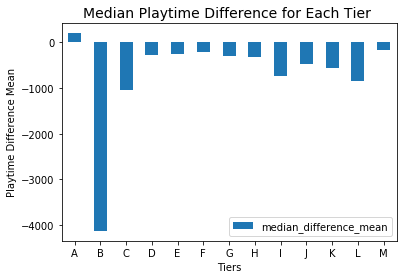

In [16]:
# Generate a bar plot showing the Total Current Online Player Each Tier using Pandas.
df3.plot.bar(x='Tiers', y='median_difference_mean',rot=0)
plt.title("Median Playtime Difference for Each Tier ", fontsize = 14)
plt.xlabel("Tiers")
plt.ylabel("Playtime Difference Mean")

In [38]:
df4=df[df['median_2weeks']>df['median_forever']]
games_increase_playtime=len(df4['name'])
percent=int(games_increase_playtime)/len(df['name'])
percentage = round(percent*100)
print(f'There are {percentage }% of the games increased median playtime in past two weeks')

There are 1% of the games increased median playtime in past two weeks
